<a href="https://colab.research.google.com/github/pingli10/project-2-part-4/blob/main/Copy_of_new_week_10_project_2_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) source of data : Heart Failure Prediction Dataset https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

2) Age': age of the patient

'Sex': sex of the patient

'ChestPainType' : chest pain type

, 'RestingBP': resting blood pressure

'Cholesterol':serum cholesterol

'FastingBS':A fasting blood sugar (FBS) level is the result of a blood sample taken after a patient fasts for at least eight hours.

'RestingECG': Resting ECG systems is designed to help improve clinical accuracy and connect you to advanced data analysis tools so you can make decisions 'MaxHR': the greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise.

'ExerciseAngina': build up your activity level gradually and take regular breaks. 'Oldpeak':ST depression induced by exercise relative to rest ( 'ST_Slope': The ST Segment represents the interval between ventricular depolarization and repolarization 'HeartDisease': yes or no heart diease

3) The target would be HeartDiease

4) This is a classification problem

5) No less meaningful feature.

6) 918 rows in the data

7) I need to encode cat data and numeric data, then to make classification prediction.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
# import knn
from sklearn.neighbors import KNeighborsClassifier

data = '/content/drive/MyDrive/coding dojo/week 10 project 2 part 3/heart.csv'

Mounted at /content/drive


In [2]:
df = pd.read_csv(data)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# check missing value
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# check duplicate value
df.duplicated().sum()

0

In [7]:
df.shape

(918, 12)

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [10]:
df['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

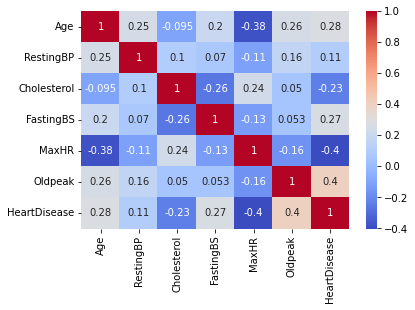

In [11]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Age', 'RestingECG','FastingBS','Oldpeak' have positive relationship with heart disease.

'Cholesterol', 'MaxHR' have negtive relationship with heart diease.

# Univariate analysis

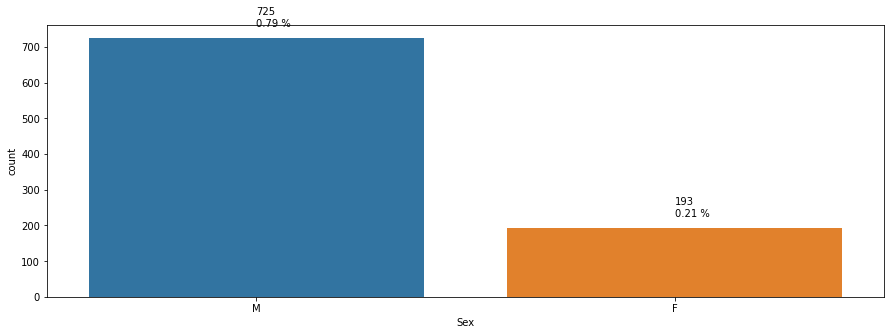

In [12]:
# age distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x='Sex');
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')

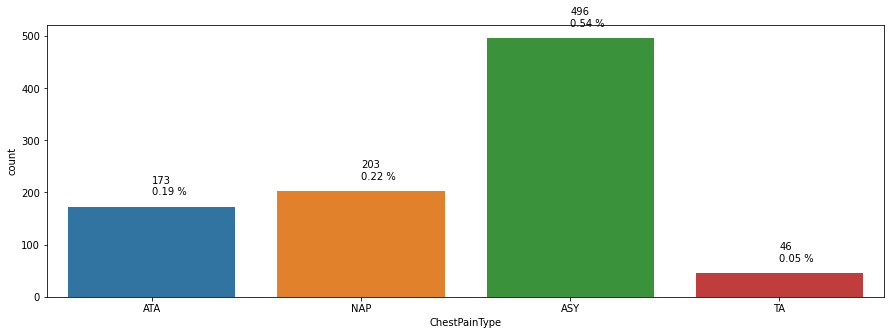

In [13]:
#chest pain distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x='ChestPainType')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')

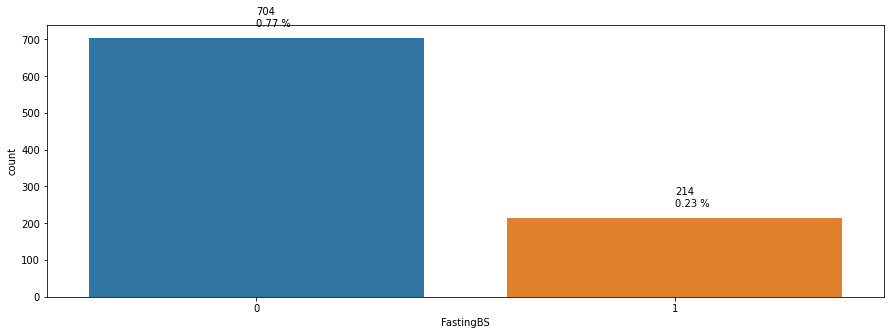

In [14]:
#Fasting Bs distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x='FastingBS')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')

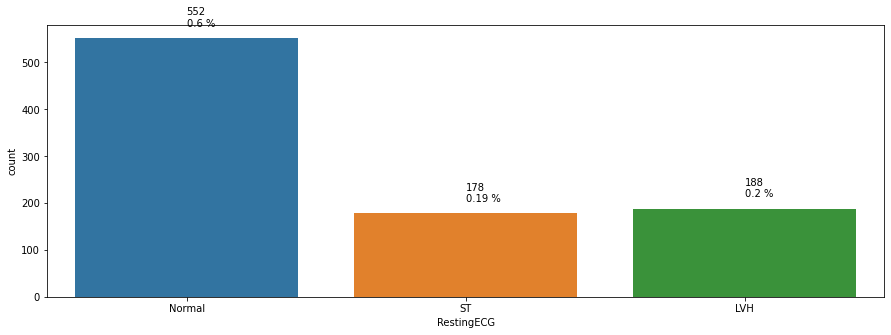

In [15]:
#Resting ECG distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x='RestingECG')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')

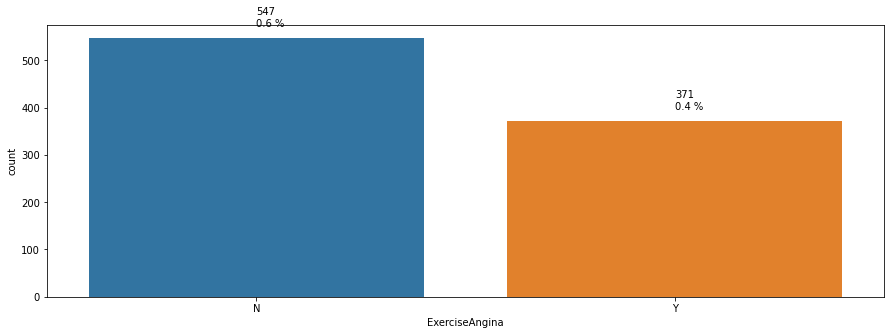

In [16]:
#Exercise Angina Distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x='ExerciseAngina')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')

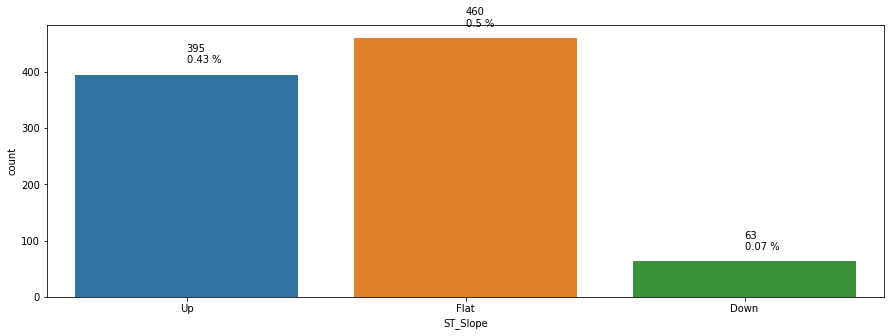

In [17]:
# ST_slope distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x='ST_Slope')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')

# To indicate value greater than 50 % and less than 10%
# Male and Female are almost 80:20.
# ASY(Chest pain type) = 54%
# 0(FastingBS) = 77%
# flat(st_slope) = 50%
# N(ExerciseAngina) = 60%
# TA(Chest pain type) = 5%
# Down(ST_Slope) = 7%

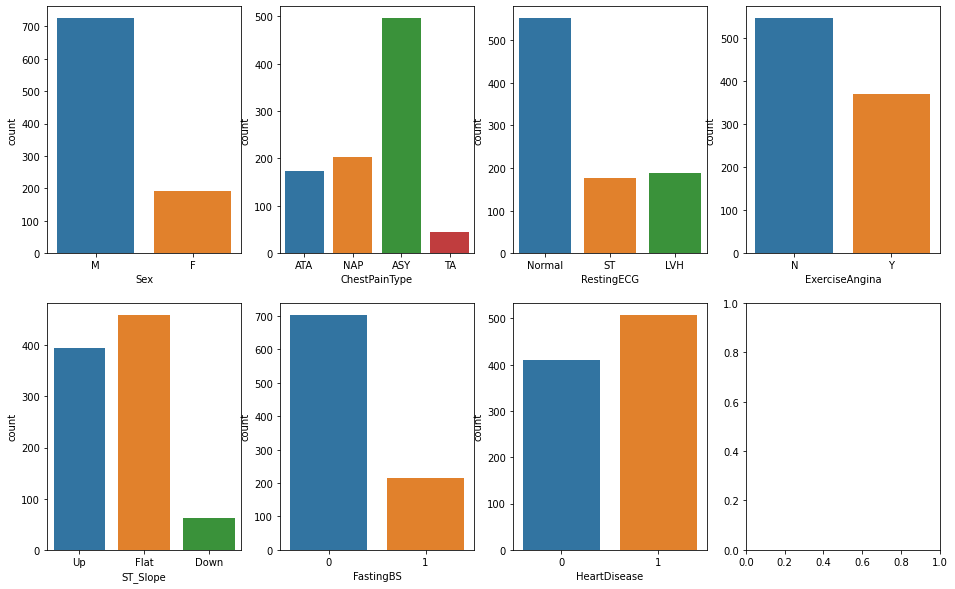

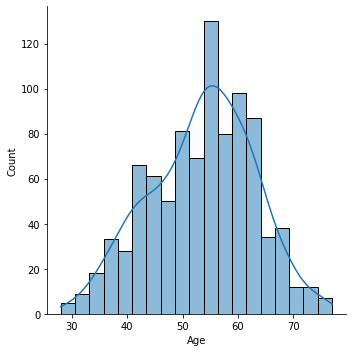

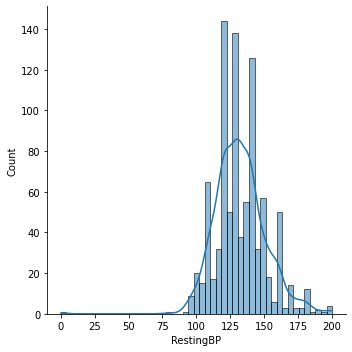

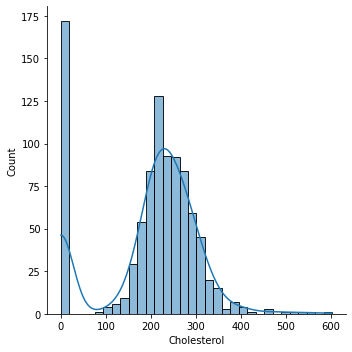

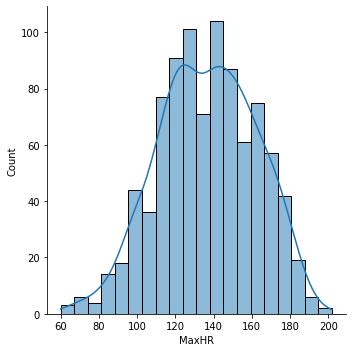

In [18]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
fig,axes = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Sex',data=df,ax=axes[0,0])
sns.countplot('ChestPainType',data=df,ax=axes[0,1])
sns.countplot('RestingECG',data=df,ax=axes[0,2])
sns.countplot('ExerciseAngina',data=df,ax=axes[0,3])
sns.countplot('ST_Slope',data=df,ax=axes[1,0])
sns.countplot('FastingBS',data=df,ax=axes[1,1])
sns.countplot('HeartDisease',data=df,ax=axes[1,2])
sns.displot(df['Age'],kde=True)
sns.displot(df['RestingBP'],kde=True)
sns.displot(df['Cholesterol'],kde=True)
sns.displot(df['MaxHR'],kde=True)


In [19]:
# see value
for col in df.columns:
  print(f'column={col}')
  print(df[col].value_counts(dropna=True))
  print('\n\n')

column=Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64



column=Sex
M    725
F    193
Name: Sex, dtype: int64



column=ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64



column=RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64



column=Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222,

In [20]:
# look old peak negtive value
old_peak = df[df['Oldpeak']<0] 
old_peak

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


# Bivariate analysis

Text(0.5, 1.0, 'KDE Age')

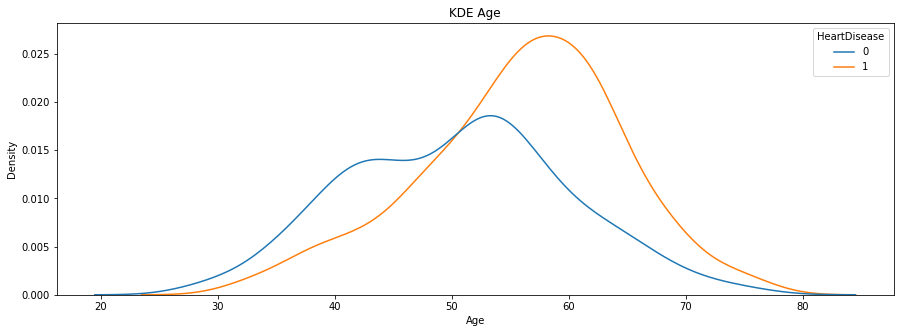

In [21]:
# kde age
plt.figure(figsize=(15,5))
sns.kdeplot(df['Age'],hue=df['HeartDisease'])
plt.title('KDE Age')

Text(0.5, 1.0, 'KDE RestingBP')

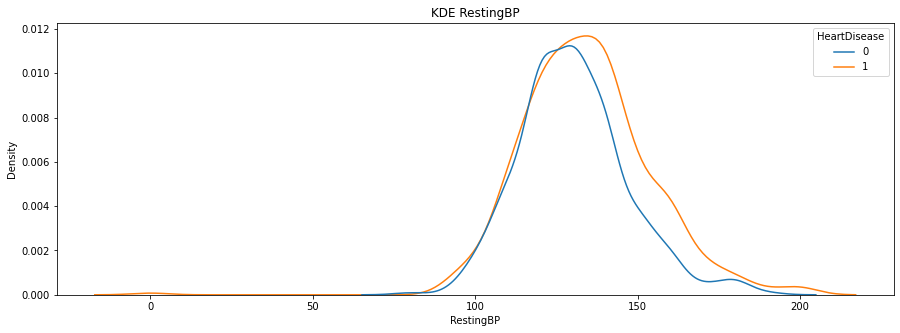

In [22]:
# kde maxHR
plt.figure(figsize=(15,5))
sns.kdeplot(df['RestingBP'],hue=df['HeartDisease'])
plt.title('KDE RestingBP')

Text(0.5, 1.0, 'KDE Cholesterol')

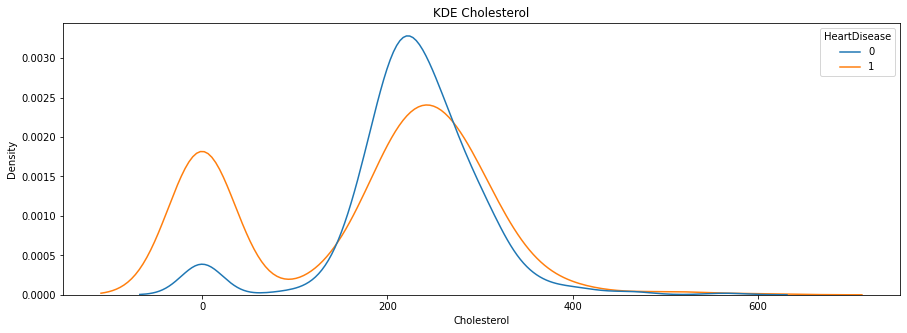

In [23]:
# KDE Cholesterol
plt.figure(figsize=(15,5))
sns.kdeplot(df['Cholesterol'],hue=df['HeartDisease'])
plt.title('KDE Cholesterol')

Text(0.5, 1.0, 'KDE MaxHR')

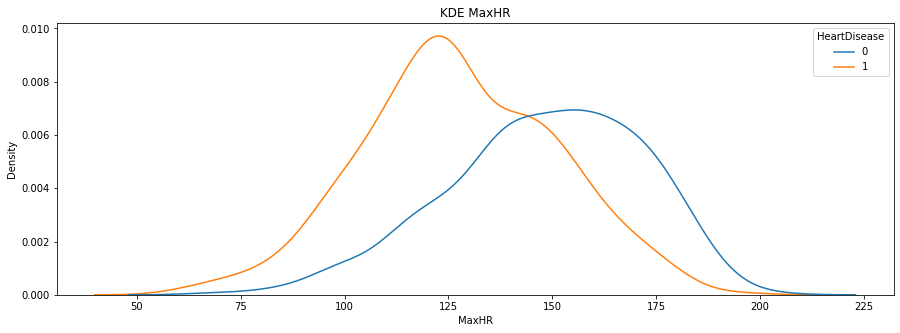

In [24]:
# kde MaxHR
plt.figure(figsize=(15,5))
sns.kdeplot(df['MaxHR'],hue=df['HeartDisease'])
plt.title('KDE MaxHR')

Text(0.5, 1.0, 'KDE Oldpeak')

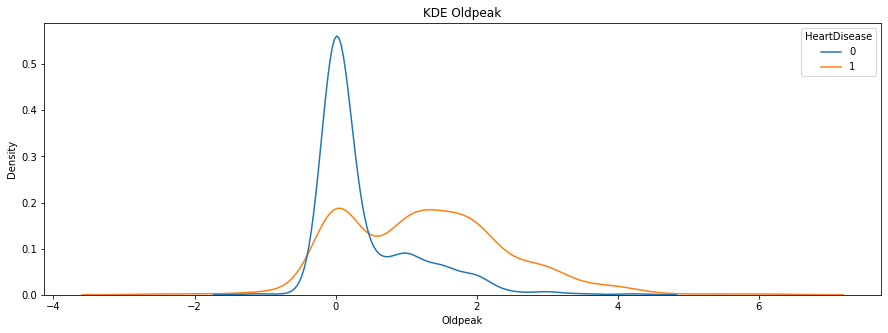

In [25]:
# KDE Oldpeak
plt.figure(figsize=(15,5))
sns.kdeplot(df['Oldpeak'],hue=df['HeartDisease'])
plt.title('KDE Oldpeak')

# OBSERVATION
1.HeartDisease risk increases as age increases from 50 to 60.

2.Higer MaxHR shows a sign of healthy heart.

3.As old peak value increases, heart disease incidence rate also increases.

4.Cholesterol having value near 200 is good for heart otherwise low and high cholesterol can cause heart disease.

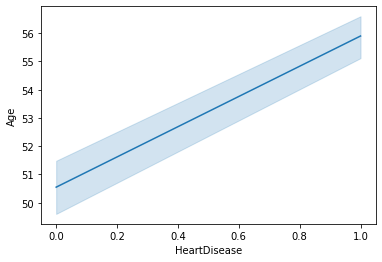

In [26]:
sns.lineplot(data=df,x='HeartDisease',y='Age')

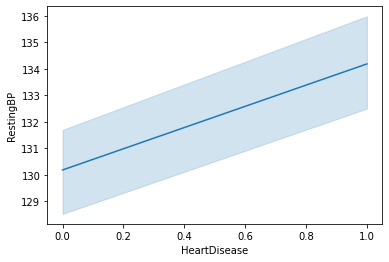

In [27]:
sns.lineplot(data=df,x='HeartDisease',y='RestingBP')

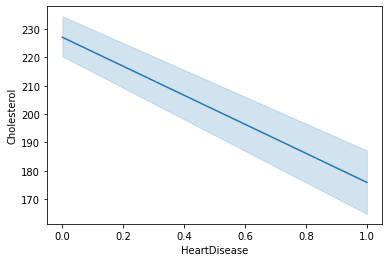

In [28]:
sns.lineplot(data=df,x='HeartDisease',y='Cholesterol')

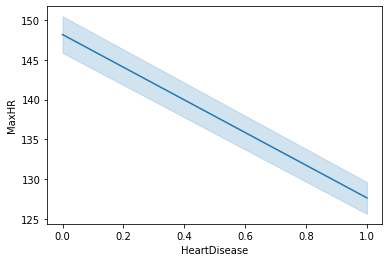

In [29]:
sns.lineplot(data=df,x='HeartDisease',y='MaxHR')

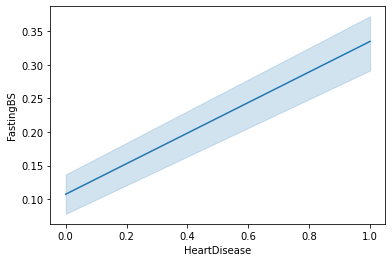

In [30]:
sns.lineplot(data=df,x='HeartDisease',y='FastingBS')

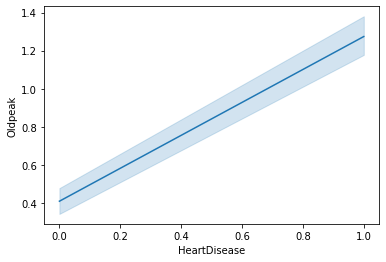

In [31]:
sns.lineplot(data=df,x='HeartDisease',y='Oldpeak')

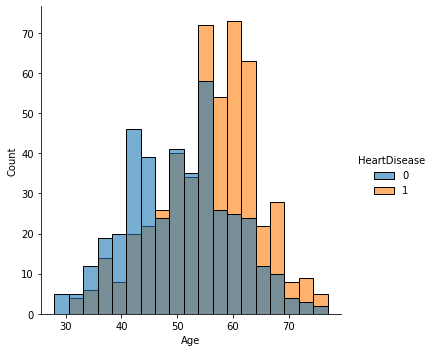

In [32]:
sns.displot(data=df,x='Age',hue='HeartDisease',alpha=0.6)

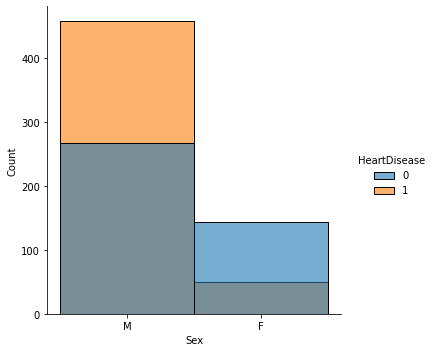

In [33]:
sns.displot(data=df,x='Sex',hue='HeartDisease',alpha=0.6)

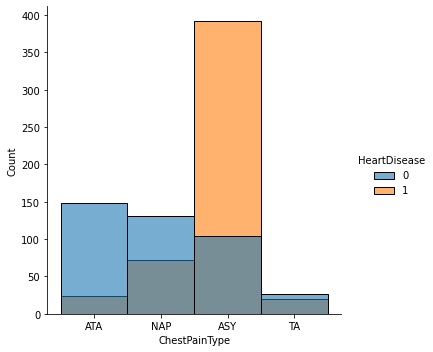

In [34]:
sns.displot(data=df,x='ChestPainType',hue='HeartDisease',alpha=0.6)

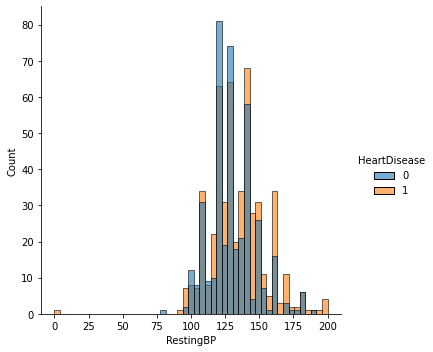

In [35]:
sns.displot(data=df,x='RestingBP',hue='HeartDisease',alpha=0.6)

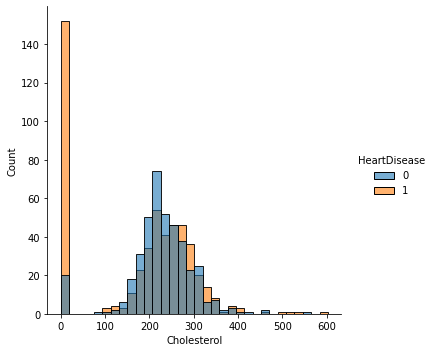

In [36]:
sns.displot(data=df,x='Cholesterol',hue='HeartDisease',alpha=0.6)

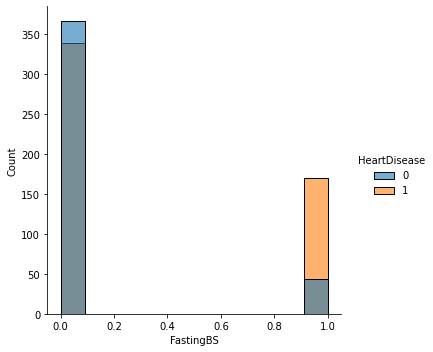

In [37]:
sns.displot(data=df,x='FastingBS',hue='HeartDisease',alpha=0.6)

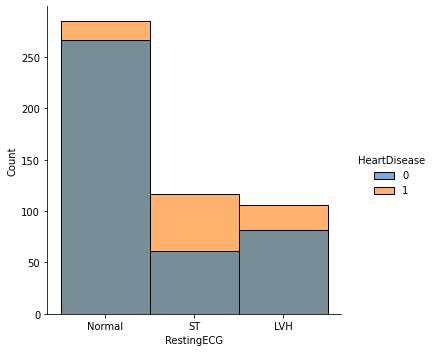

In [38]:
sns.displot(data=df,x='RestingECG',hue='HeartDisease',alpha=0.6)

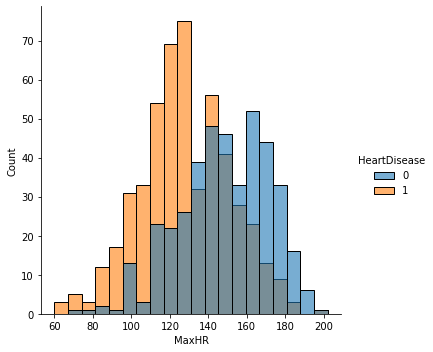

In [39]:
sns.displot(data=df,x='MaxHR',hue='HeartDisease',alpha=0.6)

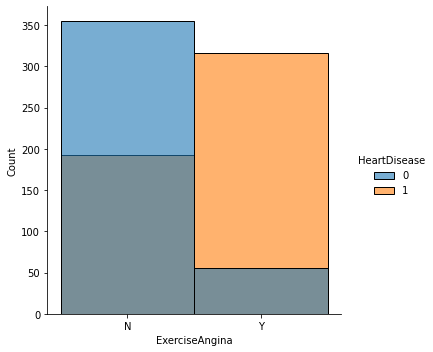

In [40]:
sns.displot(data=df,x='ExerciseAngina',hue='HeartDisease',alpha=0.6)

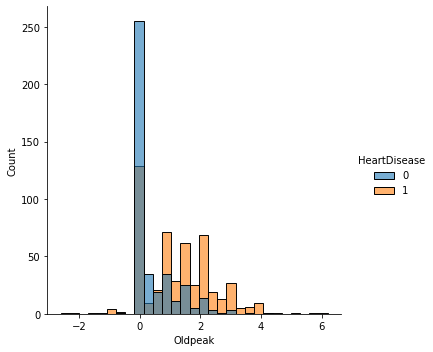

In [41]:
sns.displot(data=df,x= 'Oldpeak',hue='HeartDisease',alpha=0.6)

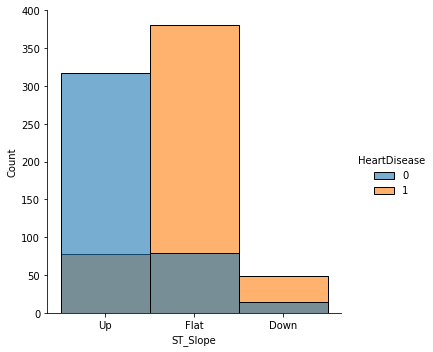

In [42]:
sns.displot(data=df,x='ST_Slope',hue='HeartDisease',alpha=0.6)

# Observation
Age', 'RestingECG','FastingBS','Oldpeak' have positive relationship with heart disease.
'Cholesterol', and 'MaxHR' have a negative relationship with heart disease.
1. The age range from 50 to 60 has a great distribution of heart disease

2. Male is mainly affected by heart disease.

3.  ASY(Chest Pain Type) has the greatest distribution of heart disease.

4. Cholesterol having a value near 200 is good for the heart otherwise low and high cholesterol can cause heart disease.

5. As the patient of fasting bs rate is 1, they are prone to get heart disease.

6. As the patients of MaxHR from 60 to 130, they are prone to get heart disease. As the patients of MaxHr from 145 to 180, they are not prone to get heart disease.

7. N(ExerciseAngina) patients are not prone to getting heart disease. y(ExerciseAngina) are prone to getting heart disease.

8. Oldpeak and heart disease have a positive relationship, old peak rate increases, and heartDisease rate increases.

9. Flat(ST_Slope) has the greatest distribution in heart disease.

In [43]:
group_sex = df.groupby('Sex')['HeartDisease'].value_counts(normalize=True)
group_sex

Sex  HeartDisease
F    0               0.740933
     1               0.259067
M    1               0.631724
     0               0.368276
Name: HeartDisease, dtype: float64

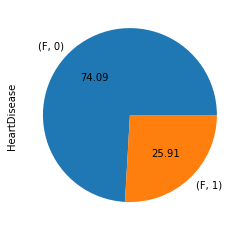

In [44]:
# pie chart for Female
group_sex.iloc[0:2,].plot(kind='pie',autopct='%.2f')


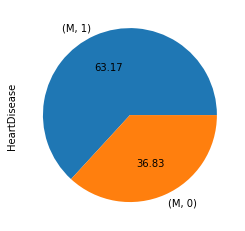

In [45]:
# pie chart for male
group_sex.iloc[2:4,].plot(kind='pie',autopct='%.2f')

In [46]:
# fasting
group_fast = df.groupby('FastingBS')['HeartDisease'].value_counts(normalize=True)
group_fast

FastingBS  HeartDisease
0          0               0.519886
           1               0.480114
1          1               0.794393
           0               0.205607
Name: HeartDisease, dtype: float64

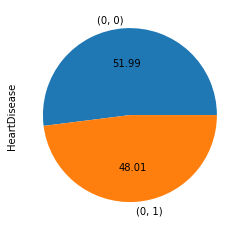

In [47]:
group_fast.iloc[0:2,].plot(kind='pie',autopct='%.2f')

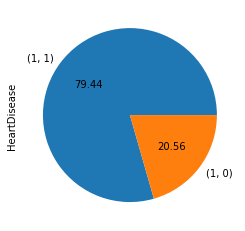

In [48]:
group_fast.iloc[2:4,].plot(kind='pie',autopct='%.2f')

In [49]:
group_chestpain = df.groupby('ChestPainType')['HeartDisease'].value_counts(normalize=True)
group_chestpain

ChestPainType  HeartDisease
ASY            1               0.790323
               0               0.209677
ATA            0               0.861272
               1               0.138728
NAP            0               0.645320
               1               0.354680
TA             0               0.565217
               1               0.434783
Name: HeartDisease, dtype: float64

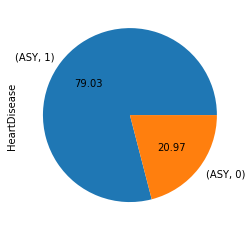

In [50]:
# pie chart for ASY(chestpain)
group_chestpain.iloc[0:2,].plot(kind='pie',autopct='%.2f')

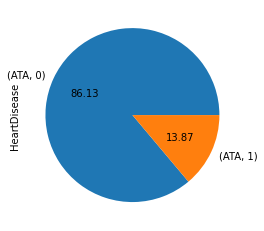

In [51]:
# pie chart for ATA(chest pain)
group_chestpain.iloc[2:4,].plot(kind='pie',autopct='%.2f')

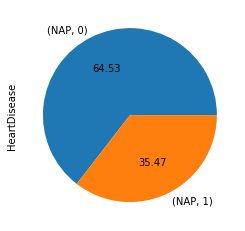

In [52]:
# pie chart for NAP(chest pain)
group_chestpain.iloc[4:6,].plot(kind='pie',autopct='%.2f')

In [53]:
resting = df.groupby('RestingECG')['HeartDisease'].value_counts(normalize=True)
resting

RestingECG  HeartDisease
LVH         1               0.563830
            0               0.436170
Normal      1               0.516304
            0               0.483696
ST          1               0.657303
            0               0.342697
Name: HeartDisease, dtype: float64

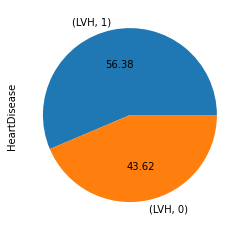

In [54]:
# pie chart for LVH (RestingECG)
resting.iloc[0:2,].plot(kind='pie',autopct='%.2f')


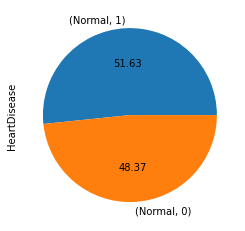

In [55]:
# pie chart for Normal(RestingECG)
resting.iloc[2:4,].plot(kind='pie',autopct='%.2f')


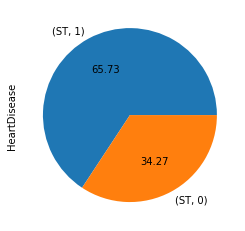

In [56]:
# pie chart for ST(RestingECG)
resting.iloc[4:6,].plot(kind='pie',autopct='%.2f')


In [57]:
group_exercise = df.groupby('ExerciseAngina')['HeartDisease'].value_counts(normalize=True)
group_exercise

ExerciseAngina  HeartDisease
N               0               0.648995
                1               0.351005
Y               1               0.851752
                0               0.148248
Name: HeartDisease, dtype: float64

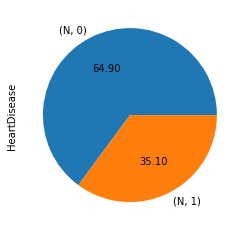

In [58]:
# pie chart for N(ExerciseAngina)
group_exercise.iloc[0:2,].plot(kind='pie',autopct='%.2f')

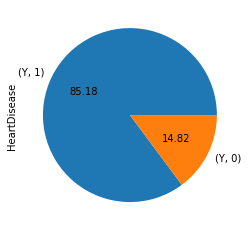

In [59]:
# pie chart for Y(ExerciseAngina)
group_exercise.iloc[2:4,].plot(kind='pie',autopct='%.2f')

In [60]:
group_slope = df.groupby('ST_Slope')['HeartDisease'].value_counts(normalize=True)
group_slope

ST_Slope  HeartDisease
Down      1               0.777778
          0               0.222222
Flat      1               0.828261
          0               0.171739
Up        0               0.802532
          1               0.197468
Name: HeartDisease, dtype: float64

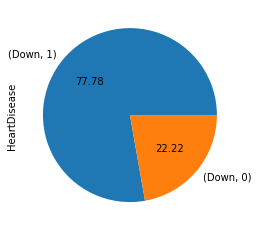

In [61]:
# pie chart for Down(ST_Slope)
group_slope.iloc[0:2,].plot(kind='pie',autopct='%.2f')

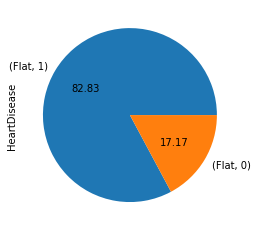

In [62]:
# pie chart for Flat(ST_Slope)
group_slope.iloc[2:4,].plot(kind='pie',autopct='%.2f')

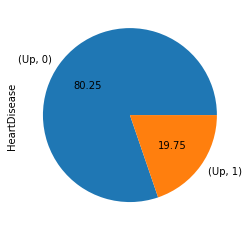

In [63]:
# pie chart for Up(ST_Slope)
group_slope.iloc[4:6,].plot(kind='pie',autopct='%.2f')

OBSERVATION

1. Male heart incidence rate is 63% but 26% of females are affected by heart disease.

2. As patients have (ASY) chest pain, they nearly have an 80% chance of person is affected by heart disease.

as patients' FastingBS rate is 1, they nearly have an 80% chance of a person being affected by heart disease.

3. For RestingECG is ST there's a 66% chance of heart disease.

4. as Patients have (Y) ExserciseAngina, they have a high risk (85%) of heart disease.

5. For ST_Slpoe of Flat and Down have high risk (i.e. 83% and 77% respectively) of heart disease whereas for ST_Slope of Up affection risk is low (20%)

In [64]:
# define feature and target
X=df.drop(columns='HeartDisease').copy()
y=df['HeartDisease'].copy()


In [65]:
# validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
# instantiate column selector
nums = make_column_selector(dtype_include='number')
cats = make_column_selector(dtype_include='object')

scaler = StandardScaler()
ohe = OneHotEncoder()

In [67]:
# instantiate column selector
nums = make_column_selector(dtype_include='number')
cats = make_column_selector(dtype_include='object')

scaler = StandardScaler()
ohe = OneHotEncoder()

In [68]:
num_tuple = (scaler,nums)
cat_tuple = (ohe,cats)

In [69]:
preprocessor = make_column_transformer(num_tuple,cat_tuple,remainder='passthrough')

# Dummy Classifier

In [70]:
dum = DummyClassifier()
dum_pipe = make_pipeline(preprocessor,dum)
dum_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb790>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb750>)])),
                ('dummyclassifier', DummyClassifier())])

# Dummy classifier

In [71]:
# default dummy 
dum_pred = dum_pipe.predict(X_test)
print(classification_report(y_test,dum_pred))
print(confusion_matrix(y_test,dum_pred))
print(f'base logistic Regression accuracy score :{dum_pipe.score(X_test,y_test):.3f}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.59      1.00      0.75       180

    accuracy                           0.59       303
   macro avg       0.30      0.50      0.37       303
weighted avg       0.35      0.59      0.44       303

[[  0 123]
 [  0 180]]
base logistic Regression accuracy score :0.594


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RandoForest Classifier

In [72]:
# instantiate random forest
rf = RandomForestClassifier()
rf_pipe = make_pipeline(preprocessor,rf)
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb790>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb750>)])),
                ('randomforestclassifier', RandomForestClassifier())])

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.92      0.86      0.89       180

    accuracy                           0.87       303
   macro avg       0.87      0.87      0.87       303
weighted avg       0.88      0.87      0.87       303

[[109  14]
 [ 25 155]]
base logistic Regression accuracy score :0.871


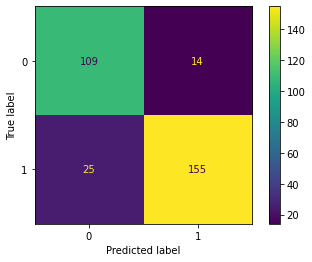

In [73]:

rf_pred = rf_pipe.predict(X_test)
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(f'base logistic Regression accuracy score :{rf_pipe.score(X_test,y_test):.3f}')
plot_confusion_matrix(rf_pipe,X_test,y_test)

In [74]:
# random forest parameters
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb790>),
                                   ('onehotencoder', OneHotEncoder(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb750>)])),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb790>),
                                 ('onehotencoder', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb750>)]

# Tunning Random Forest

In [75]:
# parameters
rf_params = {'randomforestclassifier__n_estimators': [50,100,150,200,250]}


In [76]:
# instantiate GridSearchCV
rf_gs = GridSearchCV(rf_pipe,rf_params)
rf_gs.fit(X_train,y_train)


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb790>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb750>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforest

In [77]:
rf_gs.best_params_

{'randomforestclassifier__n_estimators': 100}

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       123
           1       0.92      0.87      0.89       180

    accuracy                           0.88       303
   macro avg       0.87      0.88      0.88       303
weighted avg       0.88      0.88      0.88       303

[[110  13]
 [ 24 156]]




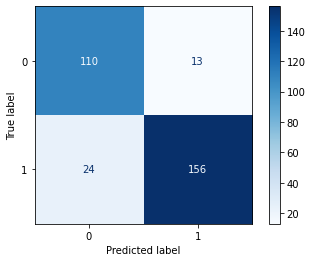

In [78]:
# best tuned random forest classifier 
best_rf_pipe = make_pipeline(preprocessor,RandomForestClassifier(n_estimators=250))
best_rf_pipe.fit(X_train,y_train)
best_rf_pred = best_rf_pipe.predict(X_test)
print(classification_report(y_test,best_rf_pred))
print(confusion_matrix(y_test,best_rf_pred))
print('\n')
plot_confusion_matrix(best_rf_pipe,X_test,y_test,cmap='Blues')

# Logistic Regression model 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       123
           1       0.93      0.86      0.90       180

    accuracy                           0.88       303
   macro avg       0.88      0.89      0.88       303
weighted avg       0.89      0.88      0.88       303

[[112  11]
 [ 25 155]]


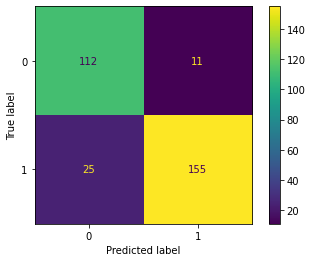

In [79]:
# logistic classifier
lg = LogisticRegression()
lg_pipe = make_pipeline(preprocessor,lg)
lg_pipe.fit(X_train,y_train)
lg_pred = lg_pipe.predict(X_test)
print(classification_report(y_test,lg_pred))
print(confusion_matrix(y_test,lg_pred))
plot_confusion_matrix(lg_pipe,X_test,y_test)

# Tunning Logistic Regression Model

In [80]:
lg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb790>),
                                   ('onehotencoder', OneHotEncoder(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb750>)])),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb790>),
                                 ('onehotencoder', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb750>)]),
 'log

In [81]:
lg_params = {'logisticregression__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'logisticregression__penalty':['l2','l1'],
                  'logisticregression__solver': ['lbfgs','liblinear']}

In [82]:
# instantiate GridSearchCV
lg_gs = GridSearchCV(lg_pipe,lg_params)
lg_gs.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb790>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7efbe06cb750>)])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__

In [83]:
lg_gs.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

# Best value for logestic Regression Model

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       123
           1       0.93      0.86      0.90       180

    accuracy                           0.88       303
   macro avg       0.88      0.89      0.88       303
weighted avg       0.89      0.88      0.88       303

[[112  11]
 [ 25 155]]


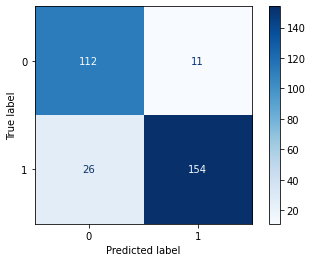

In [84]:
# best logistic regression
best_log_pipe = make_pipeline(preprocessor,LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l2'))
# fit data to x train and y train
best_log_pipe.fit(X_train, y_train)
# predict value to X_test
best_log_pred = lg_pipe.predict(X_test)
# print confusion matrix and classification report for best logistic regression model
print(classification_report(y_test,best_log_pred))
print(confusion_matrix(y_test,best_log_pred))
plot_confusion_matrix(best_log_pipe,X_test,y_test,cmap='Blues');

# Decision Tree Model

              precision    recall  f1-score   support

           0       0.64      0.80      0.71       123
           1       0.83      0.69      0.76       180

    accuracy                           0.74       303
   macro avg       0.74      0.75      0.73       303
weighted avg       0.76      0.74      0.74       303

[[ 98  25]
 [ 55 125]]


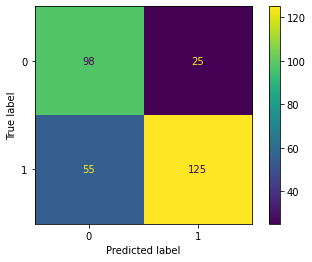

In [85]:
tree = DecisionTreeClassifier(random_state=8)
tr_pipe = make_pipeline(preprocessor,tree)
tr_pipe.fit(X_train,y_train)
tr_pred = tr_pipe.predict(X_test)
print(classification_report(y_test,tr_pred))
print(confusion_matrix(y_test,tr_pred))
plot_confusion_matrix(tr_pipe,X_test,y_test)

# KNN model

In [86]:
# default knn k=5
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [87]:
# fit defalut knn to X_train and y_train
knn_pipe = make_pipeline(preprocessor,knn)
knn_pipe.fit(X_train,y_train)
# predict value
knn_pred = knn_pipe.predict(X_test)
# print confusion matrix and classification report
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[108  15]
 [ 22 158]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       123
           1       0.91      0.88      0.90       180

    accuracy                           0.88       303
   macro avg       0.87      0.88      0.87       303
weighted avg       0.88      0.88      0.88       303



# Tunning KNN

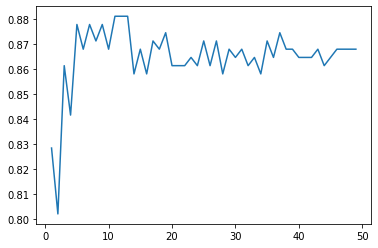

Best k value: 11 
 test accuracy: 0.8812 


In [88]:
from sklearn.metrics import accuracy_score
krn = list(range(1,50))
accuracy = []
bestacc = 0
bestk = 0
for i in krn:
  # loop accuracy 
  tune_pipe = make_pipeline(preprocessor,KNeighborsClassifier(n_neighbors=i))
  tune_pipe.fit(X_train,y_train)
  tune_predictions = tune_pipe.predict(X_test)
  run_acc = accuracy_score(y_test,tune_predictions)

  # iterate best result and assign k to best k
  if run_acc > bestacc:
    bestacc = run_acc
    bestk = i
  accuracy.append(run_acc)
  #print(f'best acc: {bestacc}')
  #print(f'run_ac: {run_acc}')
plt.plot(krn, accuracy, label='Test K Scores')
plt.show()
print(f'Best k value: {bestk} \n test accuracy: {round(bestacc,4)} ')

[[109  14]
 [ 22 158]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       123
           1       0.92      0.88      0.90       180

    accuracy                           0.88       303
   macro avg       0.88      0.88      0.88       303
weighted avg       0.88      0.88      0.88       303



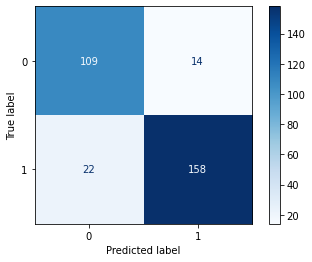

In [89]:
# create best knn pipeline
best_knn_pipe = make_pipeline(preprocessor,KNeighborsClassifier(n_neighbors=bestk))
# fit pipeline to X_train and y_train
best_knn_pipe.fit(X_train,y_train)

best_pred = best_knn_pipe.predict(X_test)
# show confusion matrix best result prediction
print(confusion_matrix(y_test,best_pred))
# show report of best result knn
print(classification_report(y_test,best_pred))
# show matrix display of best knn
plot_confusion_matrix(best_knn_pipe,X_test,y_test,cmap='Blues');

[[109  14]
 [ 23 157]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.85       123
           1       0.92      0.87      0.89       180

    accuracy                           0.88       303
   macro avg       0.87      0.88      0.87       303
weighted avg       0.88      0.88      0.88       303



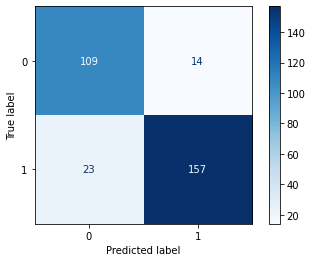

In [90]:
pca = PCA(n_components=0.99)
# create best knn pipeline
knn_pca = make_pipeline(preprocessor,pca,KNeighborsClassifier(n_neighbors=bestk))
# fit pipeline to X_train and y_train
knn_pca.fit(X_train,y_train)

pca_pred = knn_pca.predict(X_test)
# show confusion matrix best result prediction
print(confusion_matrix(y_test,pca_pred))
# show report of best result knn
print(classification_report(y_test,pca_pred))
# show matrix display of best knn
plot_confusion_matrix(knn_pca,X_test,y_test,cmap='Blues');

# knn and Random Forest both models give the result with an accuracy of 88 percent, and both models have no big differences. In our data set, negative values are non-heart disease, false negative patients have heart disease but our model considered heart disease patients as non-heart disease patients, so false negative (heart disease patients) won't get any treatment for the wrong prediction results. To be less harmful, our goal is to reduce false negative values in our ideal model.  KNN performed well with false negtive value. 